In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import tensorflow

In [11]:
import pandas as pd

In [14]:
(X_train,y_train),(X_test,y_test)=tensorflow.keras.datasets.fashion_mnist.load_data()

# data visualization

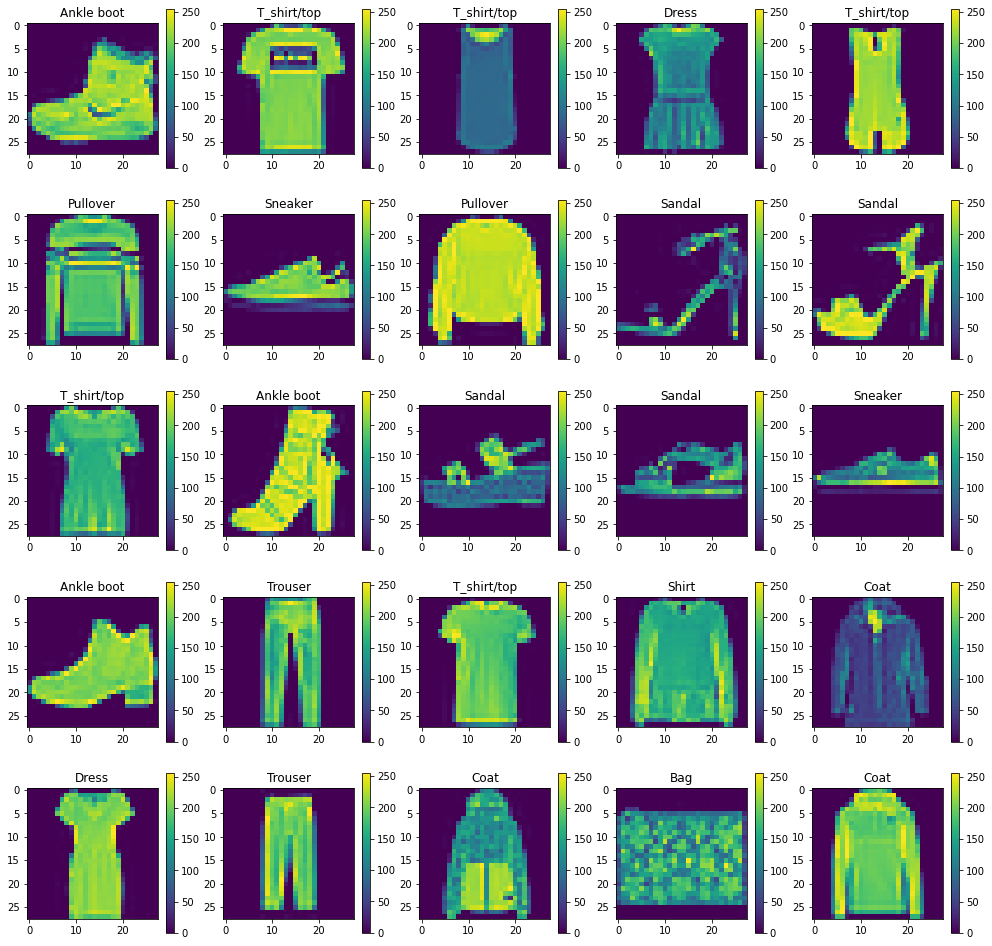

In [17]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(17, 17))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)))
    plt.colorbar()
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

# Assigning image dimensions for model
img_rows = 28
img_cols = 28
img_shape = (img_rows, img_cols,1)

X_train = X_train.reshape(X_train.shape[0],*img_shape)
X_test = X_test.reshape(X_test.shape[0],*img_shape)

# training the model using artificial neural networks(ANN)

In [22]:
 model=tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = img_shape),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax') #since we want a probability based output
])
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 20, verbose=2)

Epoch 1/20
1875/1875 - 14s - loss: 5.0107 - accuracy: 0.7685 - 14s/epoch - 7ms/step
Epoch 2/20
1875/1875 - 14s - loss: 0.5493 - accuracy: 0.8142 - 14s/epoch - 7ms/step
Epoch 3/20
1875/1875 - 14s - loss: 0.5088 - accuracy: 0.8278 - 14s/epoch - 7ms/step
Epoch 4/20
1875/1875 - 13s - loss: 0.5039 - accuracy: 0.8306 - 13s/epoch - 7ms/step
Epoch 5/20
1875/1875 - 14s - loss: 0.4822 - accuracy: 0.8400 - 14s/epoch - 7ms/step
Epoch 6/20
1875/1875 - 14s - loss: 0.4716 - accuracy: 0.8428 - 14s/epoch - 7ms/step
Epoch 7/20
1875/1875 - 13s - loss: 0.4553 - accuracy: 0.8469 - 13s/epoch - 7ms/step
Epoch 8/20
1875/1875 - 14s - loss: 0.4638 - accuracy: 0.8467 - 14s/epoch - 7ms/step
Epoch 9/20
1875/1875 - 14s - loss: 0.4473 - accuracy: 0.8505 - 14s/epoch - 7ms/step
Epoch 10/20
1875/1875 - 14s - loss: 0.4512 - accuracy: 0.8542 - 14s/epoch - 7ms/step
Epoch 11/20
1875/1875 - 14s - loss: 0.4377 - accuracy: 0.8556 - 14s/epoch - 7ms/step
Epoch 12/20
1875/1875 - 14s - loss: 0.4421 - accuracy: 0.8541 - 14s/epoch 

# PLOTTING LOSS V/S EPOCH AND ACCURACY V/S EPOCH

Text(0.5, 1.0, 'Train - Accuracy without Dropout')

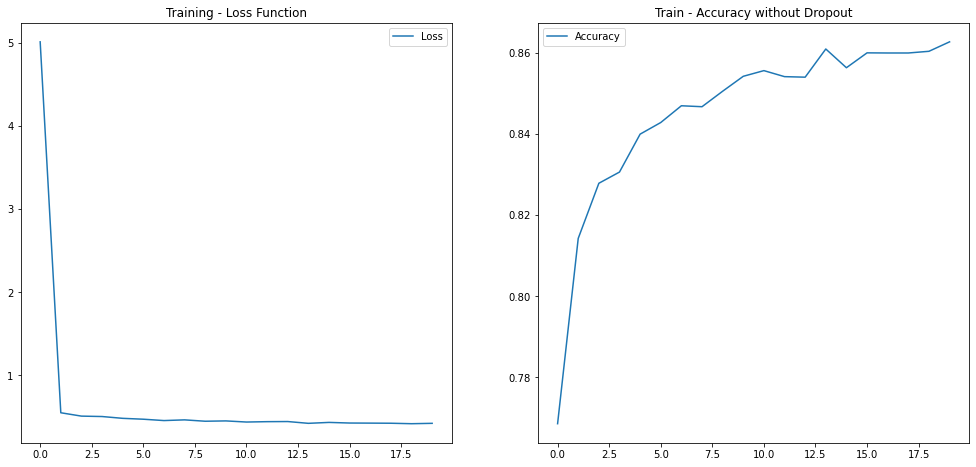

In [24]:
plt.figure(figsize=(17,17))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.legend()
plt.title('Train - Accuracy without Dropout')

# GENERATING THE CNN MODEL

In [25]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# VISUALIZING THE CNN MODEL 

In [26]:
cnn_model.summary()
cnn_model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = ['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)         

# TRAINING THE CNN MODEL

In [28]:
history = cnn_model.fit(X_train, y_train, epochs = 15, verbose=2)

Epoch 1/15
1875/1875 - 81s - loss: 0.9263 - accuracy: 0.7522 - 81s/epoch - 43ms/step
Epoch 2/15
1875/1875 - 79s - loss: 0.4718 - accuracy: 0.8239 - 79s/epoch - 42ms/step
Epoch 3/15
1875/1875 - 80s - loss: 0.4171 - accuracy: 0.8437 - 80s/epoch - 43ms/step
Epoch 4/15
1875/1875 - 79s - loss: 0.3807 - accuracy: 0.8578 - 79s/epoch - 42ms/step
Epoch 5/15
1875/1875 - 81s - loss: 0.3573 - accuracy: 0.8666 - 81s/epoch - 43ms/step
Epoch 6/15
1875/1875 - 86s - loss: 0.3407 - accuracy: 0.8745 - 86s/epoch - 46ms/step
Epoch 7/15
1875/1875 - 79s - loss: 0.3232 - accuracy: 0.8792 - 79s/epoch - 42ms/step
Epoch 8/15
1875/1875 - 79s - loss: 0.3152 - accuracy: 0.8834 - 79s/epoch - 42ms/step
Epoch 9/15
1875/1875 - 79s - loss: 0.3067 - accuracy: 0.8860 - 79s/epoch - 42ms/step
Epoch 10/15
1875/1875 - 79s - loss: 0.2991 - accuracy: 0.8900 - 79s/epoch - 42ms/step
Epoch 11/15
1875/1875 - 79s - loss: 0.2901 - accuracy: 0.8931 - 79s/epoch - 42ms/step
Epoch 12/15
1875/1875 - 80s - loss: 0.2874 - accuracy: 0.8931 -

# VISUALIZING THE PLOT OF LOSS V/S EPOCH AND ACCURACY V/S EPOCH

Text(0.5, 1.0, 'Train - Accuracy')

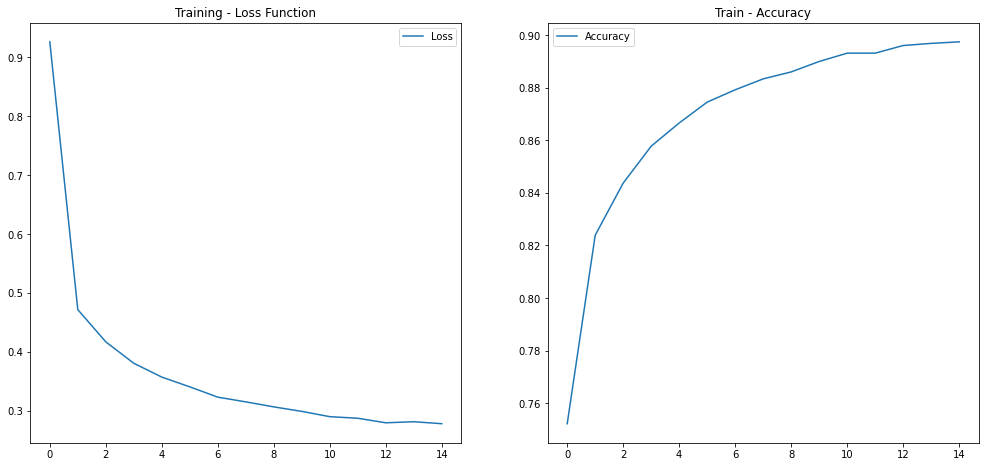

In [29]:
plt.figure(figsize=(17,17))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.legend()
plt.title('Train - Accuracy')

# CNN MODEL PREDICTION

In [30]:
predictions = cnn_model.predict(X_test)
print('Display the indices of the maximum values along an axis : {}'.format(np.argmax(predictions[0])))
print('Displaying the predictions : \n{}'.format(predictions[11]))
print('Total sum of these indices : {}'.format(np.sum(predictions[11])))

313/313 [==============================] - 3s 8ms/step
Display the indices of the maximum values along an axis : 9
Displaying the predictions : 
[1.6402604e-08 2.8902549e-09 2.7879956e-08 1.2095069e-09 3.0506701e-08
 9.9718237e-01 3.9802033e-09 2.2489678e-03 2.0196119e-05 5.4835324e-04]
Total sum of these indices : 1.0


In [33]:
test_loss, test_acc = cnn_model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 3s 9ms/step - loss: 0.2663 - accuracy: 0.9000


# ABSTRACT:
 The world in the field of technology has variegated challenges. In order to fathom the hindrances, I have come up with a project 
that is entiled: CLASSIFICATION OF CLOTHES using the FMNIST DATASET by support of deep convolutional neural network and tensorflow.
    The aim is to build a model that can predict the type of clothing based on images.

# INTRODUCTION
Fashion is one of the most important aspect of life in anything we do and in this field computers has been able to bring a huge
revolutionary change in the world of fashion through mediums of online shopping and e-commerce. These again are monitored well
using linear and non-linear optimization algorithms .
example of which like brands of Lenskart and Myntra are successfully able to use these algorithms and prosper in online shopping 
people can select the option they like and get it at their doorstep.
And today, fashion technology is growing at a faster pace than ever. Robots that sew and cut fabric, AI algorithms that 
predict style trends, clothes to be worn in virtual reality — an array of innovations show how technology is automating,
personalizing, and speeding up the fashion space.

 # SYSTEM REQUIREMENTS
 1. ANACONDA
2.  PYTHON 3.9
3. NUMPY
4. PANDAS
5. TENSORFLOW
6. SKLEARN
7. MATPLOTLIB
8. SEABORN
9. GPU(GRAPHICAL PROCESS UNIT)
10. 16 GB RAM
11. 100 GB MEMORY
# TECHNOLOGIES USED
1. TENSORFLOW
2. PYTHON
3. FMNIST DATASET
4. MATPLOTLIB
5.DEEP LEARNING
6. MACHINE LEARNING
  


# METHODOLOGY
A datset of FMNIST has been taken from the internet. The data has been cleaned and ANN and CNN model has been applied and been
 trained with a good accuracy indicating the model that has been proved to be fit.

# RESULTS AND DISCUSSIONS 
#   After the successful training of my CNN model, I have procured the accuracy of 89% which has followed up an exponential curve 
#     of increase in accuracy as we can lucidly indicate in the accuracy v/s epoch plot diapalyed in notebook.
#     The loss of the training is 2% in which we are successful to reduce the sparsh categorical cross antropy loss over the iteration.
# In the training of ANN, accuracy of 86% is obtained and loss is 4% , so the model is trained. 

# In CNN,training speed is more in comaparison to ANN, CNN is more complex.